# **Naives Bayes**, **SVC** and **Deeplearning** for Spam Detection

### El objetivo de este trabajo consiste en la comparación de Naives bayes, Support Vector Classifier y Redes Profundas a la hora de clasificar Spam.


In [1]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split

In [2]:
#Subo el dataset (spam.csv)
files.upload()

Saving spam.csv to spam.csv


{'spam.csv':...}

In [3]:
#Lo leo
df = pd.read_csv('spam.csv', encoding='latin1')
len(df)

5572

In [ ]:
#El dataset contiene caracteres extraños que confunden la lectura y se crean tres columnas extras.
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#Proporción de spam 
np.mean(df["v1"] == "spam")

0.13406317300789664

In [5]:
#Son pocos registros en comparación con el total del dataset así que los elimino
df.iloc[:,2].unique()

array([nan, ' PO Box 5249',
       ' the person is definitely special for u..... But if the person is so special',
       ' HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\\""',
       ' wanted to say hi. HI!!!\\" Stop? Send STOP to 62468"',
       'this wont even start........ Datz confidence.."', 'GN',
       '.;-):-D"',
       'just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.\\""',
       ' bt not his girlfrnd... G o o d n i g h t . . .@"',
       ' I\'ll come up"',
       ' don\'t miss ur best life for anything... Gud nyt..."',
       ' just as a shop has to give a guarantee on what they sell. B. G."',
       ' But at d end my love compromised me for everything:-(\\".. Gud mornin:-)"',
       ' the toughest is acting Happy with all unspoken pain inside..\\""',
       ' smoke hella weed\\""', '\\" not \\"what i need to do.\\""',
       'JUST GOT PAYED2DAY & I HAVBEEN GIVEN Aå£50 PAY RISE 4MY WORK & HAVEBEEN MADE PRESCHOOLCO-ORDINATOR 2I AM FEELINGOOD

In [6]:
i1 = df.iloc[:, 2].isnull()

In [7]:
df = df[i1]

In [8]:
df = df.iloc[:,0:2]


In [9]:
df.rename(columns={'v1': 'target', "v2": "text"}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#Se eliminaron 50 filas de las 5577 y se aprecia que no se perdieron muchos spam, ya que la proporción de spam en el dataset aumenta un poco
len(df), np.mean(df["target"] == "spam")

(5522, 0.1343716044911264)

In [11]:
#A continuación divido el dataset en train y test. Utilizo stratify para que haya el mismo porcentaje de spam en train y en test
train, test = train_test_split(df, stratify = df['target'], test_size = 0.3, random_state=123)

In [12]:
#se comprueba la proporción de span en train y test
len(train[train["target"] == "spam"]) / len(train), len(test[test["target"] == "spam"]) / len(test)

(0.13428201811125484, 0.13458056729028364)

In [13]:
train["target"] = (train["target"] == "spam").astype(int)
test["target"] = (test["target"] == "spam").astype(int);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
#El resultado final es un dataset compuesto por dos columnas target (1 si es spam, 0 si no lo es) y text.
train.sample(5)

,target,text
2604,0,You call times job today ok umma and ask them ...
2940,0,My supervisor find 4 me one lor i thk his stud...
2061,0,Hey ! I want you ! I crave you ! I miss you ! ...
2169,1,"Shop till u Drop, IS IT YOU, either 10K, 5K, å..."
4897,0,Oh for fuck's sake she's in like tallahassee


In [15]:
#Por último voy a revisar los nulos por si acaso. Veo que no hay ninguno.
sum(df["text"].isnull())

0

In [16]:
#Divido entre target y text

X_train = train["text"]
y_train = train["target"]

X_test = test["text"]
y_test = test["target"]

### Ya tengo los datos preparados para comenzar a trabajar con los modelos.


### **SVC**
Este modelo se basa en la proyección de los datos a un espacio dimensional mayor hasta que sea capaz de trazar un hiperplano que divida ambas categorías y posteriormente vuelve a la dimensión original. Suele dar buenos resultados a la hora de clasificar texto.

In [17]:
from sklearn.svm import SVC

Para poder utilizar el algoritmo primero hay que convertir el texto a números, para ello voy a utilizar dos propuestas: Counvectorizer (realizar una matriz en la que se contabilice el número de ocurrencias de cada palabra) y tfidfvecorizer (en este caso a la ocurrencia de cada término se le divide por la frecuencia que tiene en todos los documentos, con el fin de restar importancia a palabras que aporten menos significado).

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

Además, de cara a optimizar el SVC y el Naives Bayes voy a utilizar GridSearchCV.

In [19]:
from sklearn.model_selection import GridSearchCV

### CV

In [20]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [21]:
parameters = { 'C':[0.0001, 0.001, 0.01, 0.1, 1, 10], 'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'degree':[2,3,4,5,6], 'gamma':('scale', 'auto')}
svc = SVC(random_state = 1)
gs_svc = GridSearchCV(svc, parameters)

In [ ]:
gs_svc_cv = gs_svc.fit(X_train_cv, y_train)

In [ ]:
df_gs_svc_cv = pd.DataFrame(gs_svc_cv.cv_results_).loc[:,["param_C",	"param_degree",	"param_gamma", "param_kernel", "params", "mean_test_score", "std_test_score"]].sort_values(by = ["mean_test_score"], ascending=False)

In [ ]:
df_gs_svc_cv.head(10)

,param_C,param_degree,param_gamma,param_kernel,params,mean_test_score,std_test_score
184,1,5,scale,linear,"{'C': 1, 'degree': 5, 'gamma': 'scale', 'kerne...",0.983182,0.004008
160,1,2,scale,linear,"{'C': 1, 'degree': 2, 'gamma': 'scale', 'kerne...",0.983182,0.004008
200,10,2,scale,linear,"{'C': 10, 'degree': 2, 'gamma': 'scale', 'kern...",0.983182,0.004091
196,1,6,auto,linear,"{'C': 1, 'degree': 6, 'gamma': 'auto', 'kernel...",0.983182,0.004008
192,1,6,scale,linear,"{'C': 1, 'degree': 6, 'gamma': 'scale', 'kerne...",0.983182,0.004008
212,10,3,auto,linear,"{'C': 10, 'degree': 3, 'gamma': 'auto', 'kerne...",0.983182,0.004091
188,1,5,auto,linear,"{'C': 1, 'degree': 5, 'gamma': 'auto', 'kernel...",0.983182,0.004008
180,1,4,auto,linear,"{'C': 1, 'degree': 4, 'gamma': 'auto', 'kernel...",0.983182,0.004008
216,10,4,scale,linear,"{'C': 10, 'degree': 4, 'gamma': 'scale', 'kern...",0.983182,0.004091
176,1,4,scale,linear,"{'C': 1, 'degree': 4, 'gamma': 'scale', 'kerne...",0.983182,0.004008


In [22]:
#Creo una función para evaluar los modelos
def scores(name, model, X, y_true):
    from sklearn.metrics import accuracy_score, precision_score, recall_score
    y_hat = model.predict(X)
    precision = accuracy_score(y_true, y_hat)
    exactitud = precision_score(y_true, y_hat)
    exhaustividad = recall_score(y_true, y_hat)
    print(""" Scores {name}
        Accuracy: {precision}
        Precision: {exactitud}
        Recall: {exhaustividad}""".format(name = name,
                                                 precision = precision,
                                                 exactitud = exactitud,
                                                 exhaustividad = exhaustividad))

In [ ]:
scores("SVC CountVectorizer", gs_svc_cv, X_test_cv, y_test)

 Scores SVC CountVectorizer
        Accuracy: 0.9818949909474954
        Precision: 0.9800995024875622
        Recall: 0.8834080717488789


In [23]:
from sklearn.metrics import confusion_matrix


In [ ]:
confusion_matrix(y_test, gs_svc_cv.predict(X_test_cv))

Veo que un SVC con C = 1 y kernel lineal obtiene un Accuray del 98,19% lo cual es bastante bueno. EL recall es bastante más bajo, esta medida penaliza los falsos negativos (spam clasificado como ham), es decir, que el error que está cometiendo el algoritmo es clasificar spam como no spam, y al ser estos una proporción bastante baja del dataset el accuracy no se ve tan afectado.

Por otro lado, se observa que clasifica 4 hams como spam. Lo cual en la práctica podría ser un problema.


### Tfidf

In [24]:
tfidf =  TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Teniendo en cuenta los resultados anteriores voy a ajustar un poco los parámetros de GridSearchCV, en base a los resultados veré si es interesante probar con el total de los parámetros al igual que en caso anterior.

In [25]:
parameters = { 'C':[0.01, 0.1, 1, 10, 100], 'kernel':('linear', 'rbf'), 'gamma':('scale', 'auto')}
gs_svc = GridSearchCV(svc, parameters)

In [26]:
gs_svc_tfidf = gs_svc.fit(X_train_tfidf, y_train)

In [ ]:
pd.DataFrame(gs_svc_tfidf.cv_results_).loc[:,["param_C",	"param_gamma", "param_kernel", "params", "mean_test_score", "std_test_score"]].sort_values(by = ["mean_test_score"], ascending=False)

,param_C,param_gamma,param_kernel,params,mean_test_score,std_test_score
12,10,scale,linear,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}",0.981630,0.005136
14,10,auto,linear,"{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}",0.981630,0.005136
18,100,auto,linear,"{'C': 100, 'gamma': 'auto', 'kernel': 'linear'}",0.981371,0.005277
16,100,scale,linear,"{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}",0.981371,0.005277
10,1,auto,linear,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.980595,0.004406
8,1,scale,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.980595,0.004406
17,100,scale,rbf,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}",0.976455,0.005136
13,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.976455,0.005136
9,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.972574,0.006090
4,0.1,scale,linear,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.904787,0.002535


In [27]:
scores("SVC TfidfVectorizer", gs_svc_tfidf, X_test_tfidf, y_test)

 Scores SVC TfidfVectorizer
        Accuracy: 0.9855159927579964
        Precision: 0.9806763285024155
        Recall: 0.9103139013452914


In [28]:
confusion_matrix(y_test, gs_svc_tfidf.predict(X_test_tfidf))

array([[1430,    4],
       [  20,  203]])

Al utilizar una matriz tfidf los resultados mejoran, pero sigue existiendo el problema de los 4 ham clasificados como spam. 


### **Naives Bayes**

Este algoritmo está basado en el teorema de Bayes y asume independencia entre todas las variables, lo cual no es verdad, pero aún asi ha demostrado dar buenos resultados a la hora de clasificar texto.

Se divide en varios tipos en base a la distribución que utiliza. Para la clasificación de texto se suele utilizar la distribución Multinomial que está preparada para datos discretos (ej. número de ocurrencia de palabras), aunque en la práctica también funciona con matrices tf-idf así que voy a probar ambos casos.

In [29]:
from sklearn.naive_bayes import MultinomialNB

### CV

In [30]:
parameters = { 'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10], 'fit_prior':(True, False)}
mnb = MultinomialNB()
gs_mnb = GridSearchCV(mnb, parameters)
gs_mnb_cv = gs_mnb.fit(X_train_cv, y_train)

In [ ]:
pd.DataFrame(gs_mnb_cv.cv_results_).loc[:, ["params", "mean_test_score", "std_test_score"]].sort_values(by="mean_test_score", ascending=False)

,params,mean_test_score,std_test_score
6,"{'alpha': 0.01, 'fit_prior': True}",0.982406,0.004743
4,"{'alpha': 0.001, 'fit_prior': True}",0.980854,0.005573
8,"{'alpha': 0.1, 'fit_prior': True}",0.980854,0.006914
10,"{'alpha': 1, 'fit_prior': True}",0.980854,0.004729
2,"{'alpha': 0.0001, 'fit_prior': True}",0.980078,0.005277
0,"{'alpha': 1e-05, 'fit_prior': True}",0.979560,0.005264
5,"{'alpha': 0.001, 'fit_prior': False}",0.974386,0.004868
3,"{'alpha': 0.0001, 'fit_prior': False}",0.973868,0.005136
7,"{'alpha': 0.01, 'fit_prior': False}",0.973868,0.006359
1,"{'alpha': 1e-05, 'fit_prior': False}",0.973092,0.004729


In [31]:
scores("GNB CountVectorizer", gs_mnb_cv, X_test_cv.toarray(), y_test)

 Scores GNB CountVectorizer
        Accuracy: 0.9843089921544961
        Precision: 0.9457013574660633
        Recall: 0.9372197309417041


In [32]:
confusion_matrix(y_test, gs_mnb_cv.predict(X_test_cv.toarray()))

array([[1422,   12],
       [  14,  209]])

Los resultados del GNB usando una matriz tf son un poco peores, a pesar de lidiar mejor con los falsos negativos (spam clasificado como ham), comete bastantes errores con respecto a los falsos positivos, lo cual no interesa ya que este tipo de errores tienen peores consecuencias que los anteriores.

### Tfidf

In [33]:
gs_mnb_tfidf = gs_mnb.fit(X_train_tfidf.toarray(), y_train)

In [34]:
pd.DataFrame(gs_mnb_tfidf.cv_results_).loc[:, ["params", "mean_test_score", "std_test_score"]].sort_values(by="mean_test_score", ascending=False)

,params,mean_test_score,std_test_score
6,"{'alpha': 0.01, 'fit_prior': True}",0.983700,0.005525
8,"{'alpha': 0.1, 'fit_prior': True}",0.983441,0.004799
4,"{'alpha': 0.001, 'fit_prior': True}",0.982147,0.006090
2,"{'alpha': 0.0001, 'fit_prior': True}",0.981371,0.005704
0,"{'alpha': 1e-05, 'fit_prior': True}",0.980595,0.006068
11,"{'alpha': 1, 'fit_prior': False}",0.964036,0.008636
1,"{'alpha': 1e-05, 'fit_prior': False}",0.963001,0.006155
3,"{'alpha': 0.0001, 'fit_prior': False}",0.963001,0.007345
5,"{'alpha': 0.001, 'fit_prior': False}",0.960673,0.008720
7,"{'alpha': 0.01, 'fit_prior': False}",0.955757,0.005809


In [35]:
scores("MNB TfidfVectorizer", gs_mnb_tfidf, X_test_tfidf.toarray(), y_test)

 Scores GNB TfidfVectorizer
        Accuracy: 0.9861194930597466
        Precision: 0.9716981132075472
        Recall: 0.9237668161434978


In [36]:
confusion_matrix(y_test, gs_mnb_tfidf.predict(X_test_tfidf.toarray()))

array([[1428,    6],
       [  17,  206]])

In [37]:
x = gs_mnb_tfidf.best_estimator_
type(x) == MultinomialNB

True

Observo que al utilizar la matriz tfidf obtengo el accuracy más alto hasta el momento, pero clasifica 6 hams como spam.

### **Ensemble**

Ahoa tengo dos modelos con más del 98.5% de precisión. Voy a combinaros para intentar crear un modelo más

In [38]:
class Ensemble():
  def __init__(self, models):
    self.models = models
  def predict(self, x):
    '''Crea un array de predicciones por modelo'''
    return [model.predict(x) if type(model.best_estimator_) != MultinomialNB else model.predict(x.toarray()) for model in self.models]

In [39]:
e = Ensemble([gs_svc_tfidf, gs_mnb_tfidf])

In [40]:
np.mean(e.predict(X_test_tfidf)[0] == e.predict(X_test_tfidf)[1])

0.9873264936632469

In [41]:
#Voy a predecir spam solo si ambos modelos lo hacen.
e_pred = (e.predict(X_test_tfidf)[0] + e.predict(X_test_tfidf)[1] == 2).astype("int")

In [42]:
print("Accuracy: ", np.mean(y_test == e_pred))

Accuracy:  0.9855159927579964


In [43]:
confusion_matrix(y_test, e_pred)

array([[1434,    0],
       [  24,  199]])

Este parece ser **el mejor modelo hasta el momento**, alcanza una precisión del 98.55% sin confundir ningún ham como spam, además, por la forma en la que está construido es más difícil que cometa este tipo de errores.

Voy a revisar los resultados con los datos de entrenamiento.

In [44]:
e_pred = (e.predict(X_train_tfidf)[0] + e.predict(X_train_tfidf)[1] == 2).astype("int")

In [45]:
np.mean(e_pred == y_train)

0.9989650711513584

In [46]:
confusion_matrix(y_train, e_pred)

array([[3346,    0],
       [   4,  515]])

### **Redes profundas**

In [47]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book();

     |████████████████████████████████| 727kB 38.7MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 1.2MB 41.4MB/s 
     |████████████████████████████████| 204kB 52.8MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
Mounted at /content/gdrive


In [48]:
from fastai import *
from fastai.text.all import *

In [49]:
train.head()

,target,text
2518,0,Joy's father is John. Then John is the NAME of Joy's father. Mandan
3159,0,How much did ur hdd casing cost.
4727,0,I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to &lt;#&gt;
4076,0,Hey sathya till now we dint meet not even a single time then how can i saw the situation sathya.
3195,0,"I av a new number, . Wil u only use this one,ta."


Para comenzar hago un modelo de lenguaje de los datos. Esto realizará ciertas tareas de preprocesado de texto. 

La función de un modelo de lenguaje es predecir la siguiente palabra de un texto para lo que tiene que desarrollar un entendimiento del lenguaje, lo que será útil para mi objetivo posterior de clasificar texto.

Para ello creo un DataBlock (que es una clase particular de fastai) indicando que se trata de bloques de texto, como conseguir la x y que divida los datos con un criterio similar al que usé para los algoritmos anteriores.
Luego creo el DataLoaders a partir de este DataBlock.

In [50]:
dls_lm = DataBlock(
    blocks=TextBlock.from_df("text", is_lm=True),
    get_x=ColReader('text'), splitter=TrainTestSplitter(test_size=0.3, random_state=123, stratify=df["target"])).dataloaders(df, bs=64)    

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


El resultado es una variable dependiente y otra independiente. La independiente es similar a la dependiente pero comienza en una posición posterior y finaliza en una posición posterior. (ya que el objetivo del modelo de lenguaje es que aprenda a predecir la siguiente palabrar a partir de frase determinada).

Además, el texto es tokenizado y se le aplican ciertas reglas de preprocesado, estas se aprecian en las palabras que empiezan por "xx". Por ejemplo xxbos hace referencia a que es el comienzo de una frase (beginning of string).

In [51]:
dls_lm.show_batch(max_n=7)

,text,text_
0,"xxbos xxmaj big xxunk really xxunk the xxunk with this shower of social xxunk xxbos xxmaj sorry , xxmaj i 'll call later xxbos xxmaj xxunk . xxmaj anytime . xxmaj all the best with it . xxbos xxmaj ok.ok ok .. then .. whats ur todays plan xxbos xxmaj spending new years with my brother and his family . xxmaj lets plan to meet next week . xxmaj are you ready","xxmaj big xxunk really xxunk the xxunk with this shower of social xxunk xxbos xxmaj sorry , xxmaj i 'll call later xxbos xxmaj xxunk . xxmaj anytime . xxmaj all the best with it . xxbos xxmaj ok.ok ok .. then .. whats ur todays plan xxbos xxmaj spending new years with my brother and his family . xxmaj lets plan to meet next week . xxmaj are you ready to"
1,"< # > bus xxbos xxmaj ok i msg u b4 i leave my house . xxbos xxmaj ok ok take care . i can understand . xxbos i dun thk i 'll quit yet … h xxrep 3 m , can go jazz ? xxmaj yogasana oso can … xxmaj we can go meet em after our lessons den … xxbos xxmaj hello my boytoy … g xxrep 4 e i","# > bus xxbos xxmaj ok i msg u b4 i leave my house . xxbos xxmaj ok ok take care . i can understand . xxbos i dun thk i 'll quit yet … h xxrep 3 m , can go jazz ? xxmaj yogasana oso can … xxmaj we can go meet em after our lessons den … xxbos xxmaj hello my boytoy … g xxrep 4 e i miss"
2,"do it when i texted . i finished a long time ago and xxunk and xxunk ! xxbos xxmaj i 'm going 2 orchard now xxunk me reaching soon . u reaching ? xxbos xxmaj yeah , in fact he just asked if we needed anything like an hour ago . xxmaj when and how much ? xxbos xxmaj small problem in xxunk now asking xxunk xxbos xxmaj babe ? xxmaj you","it when i texted . i finished a long time ago and xxunk and xxunk ! xxbos xxmaj i 'm going 2 orchard now xxunk me reaching soon . u reaching ? xxbos xxmaj yeah , in fact he just asked if we needed anything like an hour ago . xxmaj when and how much ? xxbos xxmaj small problem in xxunk now asking xxunk xxbos xxmaj babe ? xxmaj you said"
3,"y lei … xxbos xxmaj ok lor … xxmaj or u wan me go look 4 u ? xxbos xxmaj be sure to check your yahoo email . xxmaj we sent photos yesterday xxbos 1 ) xxmaj go to write msg 2 ) xxmaj put on xxmaj dictionary mode 3)cover the screen with hand , 4)press < # > . 5)gently remove xxmaj ur hand .. xxmaj its interesting .. : )","lei … xxbos xxmaj ok lor … xxmaj or u wan me go look 4 u ? xxbos xxmaj be sure to check your yahoo email . xxmaj we sent photos yesterday xxbos 1 ) xxmaj go to write msg 2 ) xxmaj put on xxmaj dictionary mode 3)cover the screen with hand , 4)press < # > . 5)gently remove xxmaj ur hand .. xxmaj its interesting .. : ) xxbos"
4,. xxup its xxup been xxup longer xxup than a xxup week . xxbos xxmaj send a logo 2 ur lover - 2 names joined by a heart . xxmaj txt xxup love xxup xxunk xxup xxunk xxup xxunk eg xxup love xxup xxunk xxup eve xxunk to 87077 xxmaj yahoo ! pobox36504w45wq xxunk 4 no xxunk 150p . xxbos xxmaj then ca nt get da laptop ? xxmaj my xxunk card,xxup its xxup been xxup longer xxup than a xxup week . xxbos xxmaj send a logo 2 ur lover - 2 names joined by a heart . xxmaj txt xxup love xxup xxunk xxup xxunk xxup xxunk eg xxup love xxup xxunk xxup eve xxunk to 87077 xxmaj yahoo ! pobox36504w45wq xxunk 4 no xxunk 150p . xxbos xxmaj then ca nt get da laptop ? xxmaj my xxunk card wif
5,"> , kerala xxbos xxmaj we 're all getting worried over here , derek and taylor have already xxunk the xxunk xxbos xxmaj xxunk towards xxunk xxbos xxup babe xxrep 3 ! i m xxrep 7 i xxrep 10 s you ! i need you xxrep 3 ! i crave you xxrep 3 ! :-( … g xxrep 4 e … xxmaj i 'm so sad without you babe … i love",", kerala xxbos xxmaj we 're all getting worried over here , derek and taylor have already xxunk the xxunk xxbos xxmaj xxunk towards xxunk xxbos xxup babe xxrep 3 ! i m xxrep 7 i xxrep 10 s you ! i need you xxrep 3 ! i crave you xxrep 3 ! :-( … g xxrep 4 e … xxmaj i 'm so sad without you babe … i love you"
6,"xxmaj camera - xxmaj you are awarded a sipix xxmaj digital xxmaj camera

Para crear este clasificador de texto voy a utilizar tranfer learning, que consiste en una téctica que utiliza un modelo que ya ha sido entrenado sobre unos datos para posteriormente entrenarlo sobre los datos con los que queremos trabajar.

Para poder realizar esto hay que seguir dos pasos:

1.  Realizar un fine-tune sobre un modelo de lenguaje que ya ha sido entrenado con wikipedia para que aprenda el corpus específico (spam). 
2.  Usar ese modeo de lenguaje para entrenar el clasificador de spam.

**1. Fine-tune del modelo de lenguaje**

Utilizaré una arquitectura LSTM, que se encarga de tener la información necesaria para predecir el siguiente token (palabra) y además de recordar todo lo que ha pasado en la frase. 

Concretamente utilizaré una arquitectura AWD-LSTM, en la que además se aplican ciertas técnicas de regularización.

In [110]:
learn = language_model_learner(
    dls_lm, AWD_LSTM, drop_mult=0.3, 
    metrics=[accuracy, Perplexity()]).to_fp16()

SuggestedLRs(lr_min=0.06309573650360108, lr_steep=0.12022644281387329)

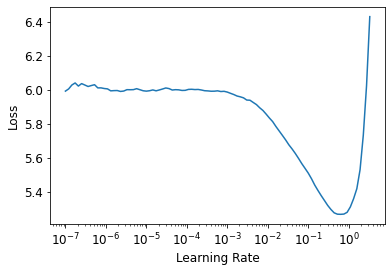

In [75]:
learn.lr_find()

In [111]:
# Realizo el fine tune
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.736644,4.125875,0.260634,61.921936,00:06


In [113]:
learn.unfreeze()

SuggestedLRs(lr_min=0.0009120108559727668, lr_steep=0.00363078061491251)

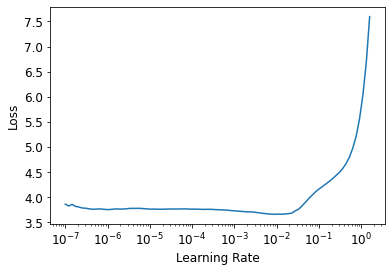

In [114]:
learn.lr_find()

In [115]:
learn.fit_one_cycle(10, lr_max=slice(1e-6, 5e-3))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.755064,4.076214,0.263913,58.921986,00:06
1,3.702020,3.967577,0.277754,52.856293,00:06
2,3.606522,3.873933,0.291426,48.131317,00:06
3,3.489074,3.811222,0.301915,45.205627,00:06
4,3.370208,3.771720,0.308738,43.454739,00:06
5,3.261364,3.750143,0.313971,42.527176,00:06
6,3.160899,3.738958,0.318046,42.054131,00:06
7,3.077623,3.733102,0.318528,41.808590,00:06
8,3.007001,3.730775,0.320433,41.711418,00:06
9,2.957003,3.730435,0.320361,41.697258,00:06


In [116]:
# Guardo el modelo de lenguaje sin la última capa que se encarga de transformar activación en
# probabilidades de coger cada token del vocabulario.

learn.save_encoder('finetuned')

**2. Entreno el clasificador**

Creo el DataBlock para el clasificador haciendo uso del vocab del modelo de lenguaje anterior con el fin de asegurarme de que exista la misma correspondencia de token e index y así poder utilizar los embeddings aprendidos en el fine-tuning del modelo de lenguaje anterior.

In [117]:
dls_clas = DataBlock(
    blocks=(TextBlock.from_df("text", vocab=dls_lm.vocab),CategoryBlock),
    get_y=ColReader('target'),
    get_x=ColReader('text'), splitter=TrainTestSplitter(test_size=0.3, random_state=123, stratify=df["target"])).dataloaders(df, bs=64)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Se aprecia como en este caso el resultado es bastante diferente. Como variable dependiente se encuentra cada uno de los sms tras haber sido preprocesados y como variable independiente su clase (spam o ham).

In [118]:
dls_clas.show_batch(max_n=5)

,text,category
0,"xxbos xxmaj the last thing i ever wanted to do was hurt you . xxmaj and i did n't think it would have . xxmaj you 'd laugh , be embarassed , xxunk the xxunk and keep going . xxmaj but as far as i knew , it was n't even up . xxmaj the fact that you even felt like i would do it to hurt you shows you really do n't know me at all . xxmaj it was xxunk wednesday , but it was n't bad . xxmaj the problem i have with it is you xxup have the time to clean it , but you choose not to . xxmaj you skype , you take pictures , you sleep , you want to go out . i do n't mind a few things here and there , but when you do n't make the bed ,",ham
1,"xxbos xxmaj sad story of a xxmaj man - xxmaj last week was my b'day . xxmaj my xxmaj wife did'nt wish me . xxmaj my xxmaj parents forgot n so did my xxmaj kids . i went to work . xxmaj even my xxmaj colleagues did not wish . xxmaj as i entered my cabin my xxup pa said , '' xxmaj happy xxmaj b'day xxmaj boss ! ! '' . i felt special . xxmaj she askd me 4 lunch . xxmaj after lunch she invited me to her apartment . xxmaj we went there . xxmaj she said , ' ' do u mind if i go into the bedroom for a minute ? '' ' ' ok ' ' , i sed in a sexy mood . xxmaj she came out 5 minuts latr wid a cake … n xxmaj my xxmaj wife , xxmaj my",ham
2,"xxbos xxmaj sad story of a xxmaj man - xxmaj last week was my b'day . xxmaj my xxmaj wife did'nt wish me . xxmaj my xxmaj parents forgot n so did my xxmaj kids . i went to work . xxmaj even my xxmaj colleagues did not wish . xxmaj as i entered my cabin my xxup pa said , '' xxmaj happy xxmaj b'day xxmaj boss ! ! '' . i felt special . xxmaj she askd me 4 lunch . xxmaj after lunch she invited me to her apartment . xxmaj we went there . xxmaj she said , ' ' do u mind if i go into the bedroom for a minute ? '' ' ' ok ' ' , i sed in a sexy mood . xxmaj she came out 5 minuts latr wid a cake … n xxmaj my xxmaj wife , xxmaj my",ham
3,xxbos xxmaj for me the love should start with xxunk should feel that i need her every time around xxunk should be the first thing which comes in my xxunk would start the day and end it with xxunk should be there every time i xxunk will be then when my every xxunk has her xxunk life should happen around xxunk life will be xxunk to xxunk would cry for xxunk give all my happiness and take all her xxunk will be ready to fight with anyone for xxunk will be in love when i will be doing the xxunk things for xxunk will be when i do n't have to xxunk anyone that my girl is the most beautiful lady on the whole xxunk will always be xxunk xxunk for xxunk will be when i start up making chicken xxunk and end up xxunk xxunk will be the most,ham
4,"xxbos a xxmaj boy loved a gal . xxmaj he xxunk bt she did nt mind . xxmaj he xxunk xxunk xxunk , xxmaj bt her frnds xxunk thm . xxmaj again d boy decided 2 xxunk d gal , xxunk time a xxunk was xxunk towards d gal . xxmaj wn it was about 2 hit d girl , d boy ran like hell n saved her . xxmaj she asked ' hw cn u run so fast ? ' d boy replied \ xxmaj boost is d secret of my energy "" n instantly d girl shouted "" our energy "" n xxmaj xxunk xxunk xxunk xxunk drinking boost xxunk xxmaj moral of d xxunk i hv free msgs : d ; ) : gud ni8 """,ham


In [196]:
# Creo el modelo de clasificación
learn = text_classifier_learner(dls_clas, AWD_LSTM, drop_mult=0.5, 
                                metrics=accuracy).to_fp16()

In [197]:
# Cargo el modelo de lenguaje ya "entrenado" (fine-tuning)
learn = learn.load_encoder('finetuned')

SuggestedLRs(lr_min=0.017378008365631102, lr_steep=0.43651583790779114)

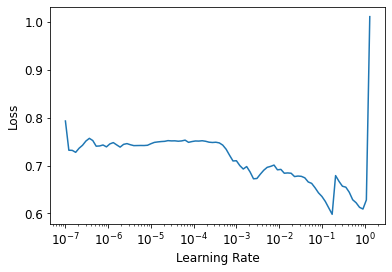

In [198]:
learn.lr_find()

In [199]:
#Comienzo el entrenamiento del clasificador
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.419330,0.114824,0.969825,00:06


In [200]:
# Para ello iré "descogelando" (unfreezing) las capas poco a poco,
# puesto que esto para NLP ha demostrado dar buenos resultados.
learn.freeze_to(-2)

SuggestedLRs(lr_min=0.0009120108559727668, lr_steep=2.75422871709452e-06)

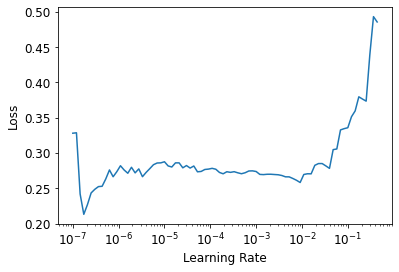

In [201]:
learn.lr_find()

In [202]:
learn.fit_one_cycle(1, slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.238382,0.072888,0.989740,00:06


In [203]:
learn.freeze_to(-3)

SuggestedLRs(lr_min=0.0005248074419796466, lr_steep=2.75422871709452e-06)

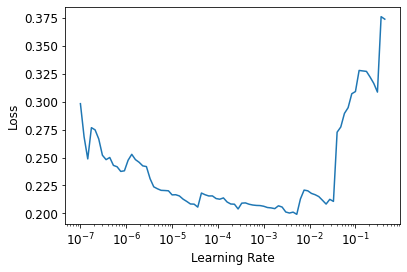

In [204]:
learn.lr_find()

In [205]:
learn.fit_one_cycle(1, slice(1e-5, 2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.173166,0.062180,0.992154,00:06


In [206]:
learn.unfreeze()

SuggestedLRs(lr_min=0.00043651582673192023, lr_steep=0.17378008365631104)

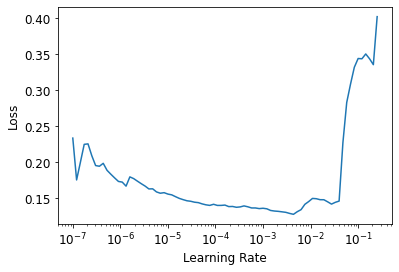

In [207]:
learn.lr_find()

In [208]:
learn.fit_one_cycle(3, slice(1e-4, 2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.126517,0.035224,0.990947,00:07
1,0.088867,0.027659,0.990344,00:07
2,0.051315,0.026458,0.993361,00:07


Para calcular los scores la función ya creada no me vale, así que primero creo el vector de predicciones sobre X_test y posteriormente calculo las medidas.

In [ ]:
#Creo un vector con todas las predicciones para el test set
y_hat = [1 if learn.predict(text)[0] == "spam" else 0 for text in X_test]

In [236]:
def scores_2(name,y_hat, y_true):
  
    from sklearn.metrics import accuracy_score, precision_score, recall_score
    precision = accuracy_score(y_true, y_hat)
    exactitud = precision_score(y_true, y_hat)
    exhaustividad = recall_score(y_true, y_hat)
    print(""" Scores {name}
        Accuracy: {precision}
        Precision: {exactitud}
        Recall: {exhaustividad}""".format(name = name,
                                                 precision = precision,
                                                 exactitud = exactitud,
                                                 exhaustividad = exhaustividad))

In [237]:
scores_2("Redes Profundas Recurrentes (RNN)", y_hat, y_test)

 Scores Redes Profundas Recurrentes (RNN)
        Accuracy: 0.9933614966807484
        Precision: 0.9953271028037384
        Recall: 0.9551569506726457


In [238]:
confusion_matrix(y_test, y_hat)

array([[1433,    1],
       [  10,  213]])

La red profunda recurrente (RNN) obtiene el accuracy más alto, pero clasifica un ham como spam.

### **Ensemble final**

Voy a realizar un modelo juntando el MultinomialNB-tfidf, el SVC-tfidf y la RNN de tal manera que dos de los modelos han de predecir spam para que un sms sea considerado como tal.

In [261]:
# Creo un vector con las predicciones de X_test para cada modelo
e = Ensemble([gs_svc_tfidf, gs_mnb_tfidf])
svc_preds, mnb_preds = e.predict(X_test_tfidf)
rnn_preds = np.array(y_hat)

In [271]:
final_model_preds = (mnb_preds + rnn_preds + svc_preds > 1).astype("int")

In [272]:
scores_2("RNN + SVC-tfidf, MNB-tfidf",final_model_preds, y_test)

 Scores RNN + SVC-tfidf, MNB-tfidf
        Accuracy: 0.9909474954737477
        Precision: 1.0
        Recall: 0.9327354260089686


In [273]:
confusion_matrix(y_test, final_model_preds)

array([[1434,    0],
       [  15,  208]])

### **Conclusiones finales**

**La mejor versión de cada uno de los modelos** obtiene **98.5%+ de precisión**, siendo **la RNN** el que consigue el mayor valor en esta medida **(99.34%)**.

Debido al caso particular en el que me encuentro (detección de spam), a pesar de que la RNN obtenga la mejor precisión, esta clasifica un ham como spam, lo cual en la práctica puede tener serias consecuencias. 

Debido a esto, consideré útil realizar una **combinación (Ensemble) de los tres modelos** en la que para que un sms sea clasificado como spam es necesario que dos de los modelos lo consideren así. El resultado de esta práctica fue una precisión un poco más baja que la RNN **(99.1%)**, pero coseguí que ningún sms fuera clasificado erroneamente como spam.

De los 1657 sms que forman el test set, solo 15 spams no fueron detectados, por lo que considero que en la práctica estos resultados podrían ser válidos.